# Problem Statement:

To predict the cost required to ship the sculptures to customers based on the information provided in the dataset.

In [69]:
# Importing Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [70]:

data = pd.read_csv('train.csv')


Dataset link :
https://www.kaggle.com/datasets/oossiiris/hackerearth-machine-learning-exhibit-art

In [71]:
data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


# Basic EDA

In [72]:
features=data.columns
print(features)

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [74]:
data.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [75]:
data.nunique()

Customer Id              6500
Artist Name              6449
Artist Reputation         101
Height                     65
Width                      40
Weight                   4410
Material                    7
Price Of Sculpture       3424
Base Shipping Price      3732
International               2
Express Shipment            2
Installation Included       2
Transport                   3
Fragile                     2
Customer Information        2
Remote Location             2
Scheduled Date           1660
Delivery Date            1664
Customer Location        6500
Cost                     6356
dtype: int64

In [76]:
data.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [77]:
[x for x in features if data[x].isnull().sum()>0]

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Material',
 'Transport',
 'Remote Location']

In [78]:
categorical_list = []
var_list = []

# looping on whole dataset for geting list of categorical and numerical data column name

for x in data.columns:
    if data[x].dtype=='object':
        categorical_list.append(x)
    elif  data[x].dtype=='float64':
        var_list.append(x)
    elif data[x].dtype=='int64':
        var_list.append(x)
  
  


print('Categorical data',categorical_list)
print('Numerical data', var_list)

Categorical data ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']
Numerical data ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']


# Correlation Matrix

In [79]:
data.corr()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


<AxesSubplot:>

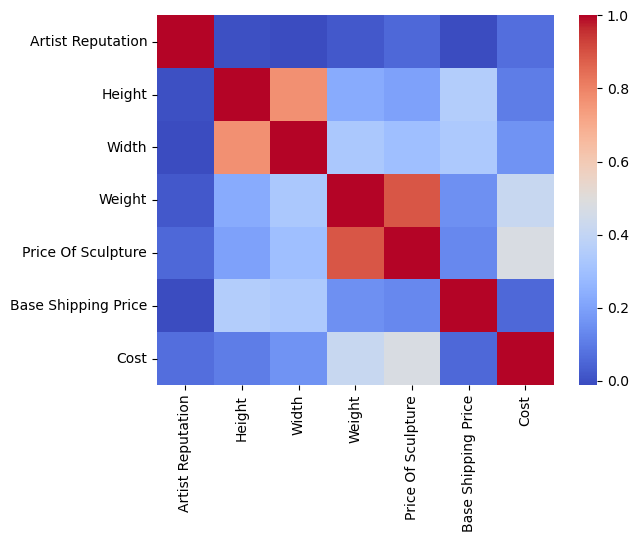

In [80]:
sns.heatmap(data.corr(),cmap='coolwarm')

# From above correlation matrix:
    
1. Artist Reputation and all other numerical variables have almost no correlation.

2. Height and Width are strongly correlated.

3. Weight and Price of Sculpture are strongly correlated.

4. Cost has weak correlation with Weight and Prie of Sculpture.

# PLOTTING OF DATASET

Text(0.5, 1.0, 'Distribution of Cost')

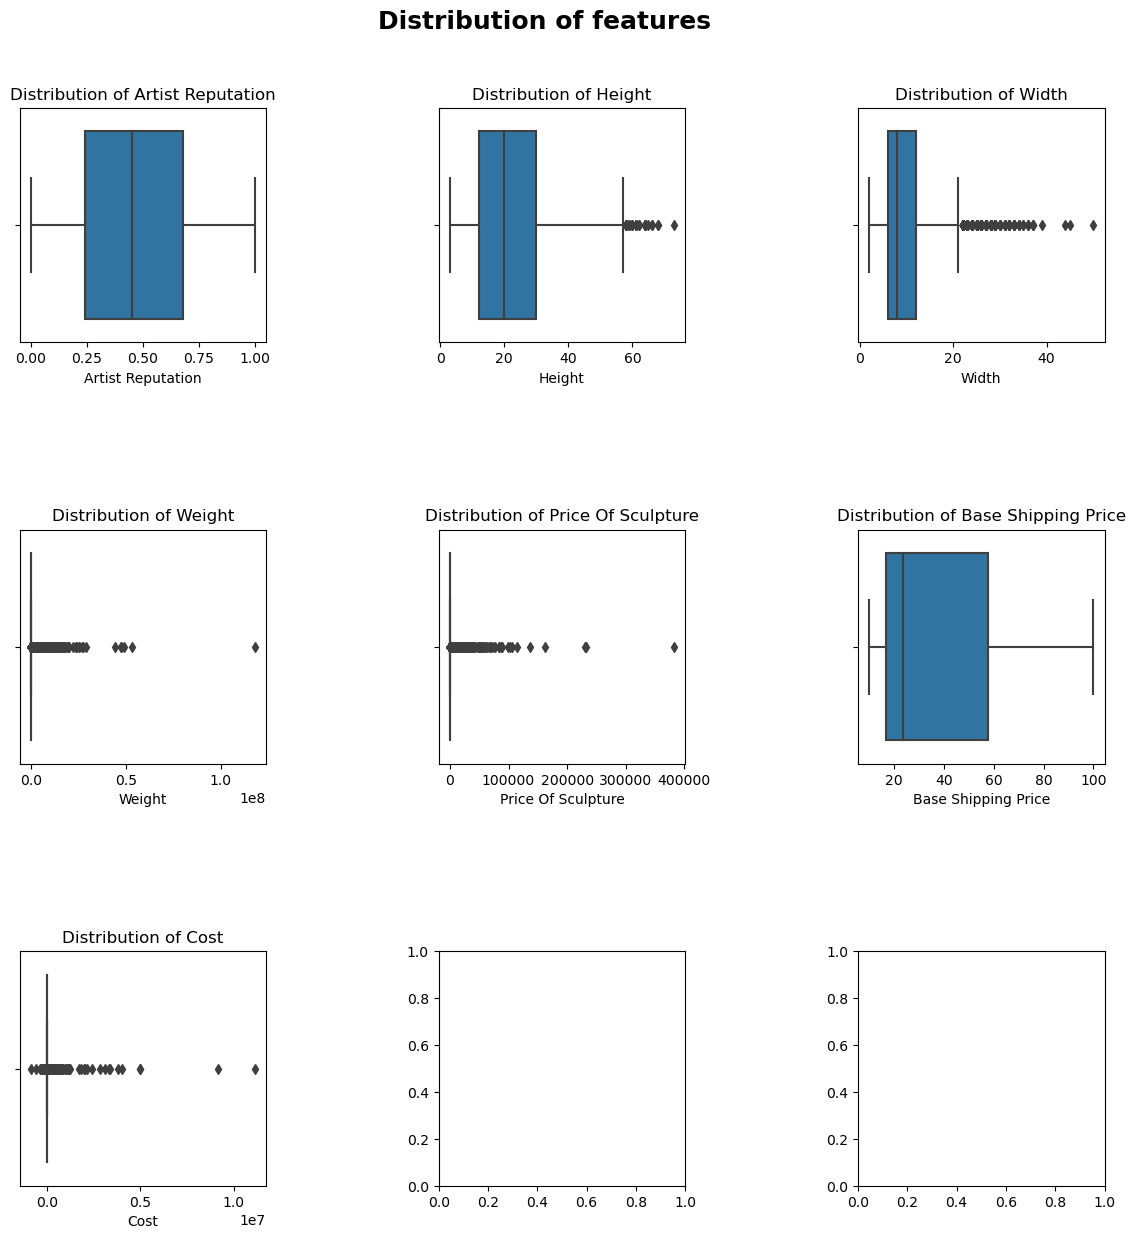

In [81]:
# Investigate the distribution of our features using boxplots

b=20

fig, axes = plt.subplots(3, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=data, x=var_list[0])
ax.set_title(f'Distribution of {var_list[0]}')

ax1 = sns.boxplot(ax = axes[0,1], data=data, x=var_list[1])
ax1.set_title(f'Distribution of {var_list[1]}')

ax2 = sns.boxplot(ax = axes[0,2], data=data, x=var_list[2])
ax2.set_title(f'Distribution of {var_list[2]}')

ax3 = sns.boxplot(ax = axes[1,0], data=data, x=var_list[3])
ax3.set_title(f'Distribution of {var_list[3]}')

ax4 = sns.boxplot(ax = axes[1,1], data=data, x=var_list[4])
ax4.set_title(f'Distribution of {var_list[4]}')

ax5 = sns.boxplot(ax = axes[1,2], data=data, x=var_list[5])
ax5.set_title(f'Distribution of {var_list[5]}')

ax6 = sns.boxplot(ax = axes[2,0], data=data, x=var_list[6])
ax6.set_title(f'Distribution of {var_list[6]}')

array([[<AxesSubplot:title={'center':'Artist Reputation'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Price Of Sculpture'}>,
        <AxesSubplot:title={'center':'Base Shipping Price'}>],
       [<AxesSubplot:title={'center':'Cost'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

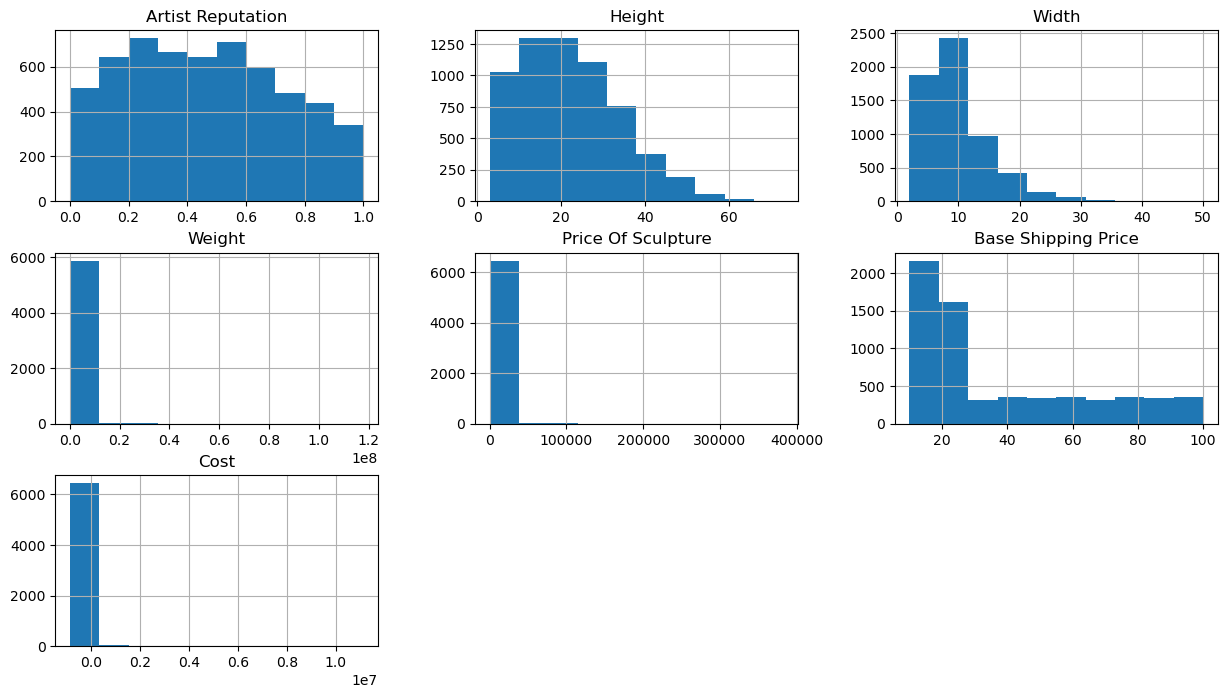

In [82]:
# Investigate the distribution of our features using histograms

data.hist(figsize=(15,8))

# From the above plots

1. Artist Reputation data distribution is symmetric.

2. Height data distribution is skewed right.

3. Width data distribution is skewed right.

4. Weight data distribution is skewed right.

5. Price Of Sculpture data distribution is skewed right.

6. Base Shipping Price data distribution is skewed right.

7. Cost data distribution is skewed right.

# Missing values and Scaling

<AxesSubplot:>

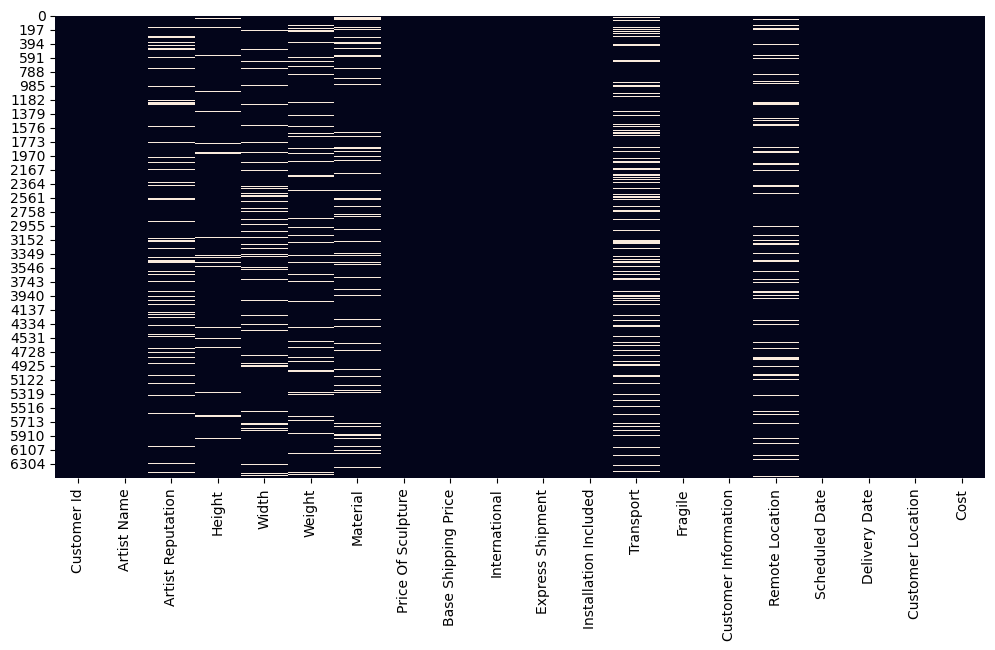

In [83]:
# Visualize missings pattern of the dataframe

plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)

In [84]:
# Calculating the mean and median of the columns 
Artist_Reputation_mean = data['Artist Reputation'].mean()
Height_mean = data['Height'].mean()
Width_mean = data['Width'].mean()
Weight_median = data['Weight'].median()

In [85]:
# Making a copy of the dataset 
data_copy = data.copy(deep=True)



In [86]:
# Extracting State code from the Customer Location column E.g. New Michelle, OH 50777 - State Code: OH 
def clean_customer_location(df2):
    converted_list_1 = []
    for i in df2:
        converted_list_1.append(i.split()[-2])
    return converted_list_1

In [87]:
data['Customer Location'] = clean_customer_location(data["Customer Location"])

In [88]:
data.head(2)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,OH,-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,WY,-159.96


In [89]:
# preparing data before feeding the model
# Helper function for preparing data with parameter datframe.

def prepare_data(df):
  # Drop the irrelevant columns from the dataset
  df.drop(['Customer Id','Artist Name'],axis=1,inplace=True)
  

  # Filling missing values in the 'Artist Reputation' column
  df['Artist Reputation_NA'] = np.where(df['Artist Reputation'].isnull(),1,0)
  df['Artist Reputation'].fillna(Artist_Reputation_mean,inplace=True)
  
  
  # Filling missing values in the 'Transport' column
  df['Transport_NA'] = np.where(df['Transport'].isnull(),1,0)
  df['Transport'].fillna(df['Transport'].mode()[0],inplace=True)  
 
 

  # Filling missing values in the 'Remote Location' column
  df['Remote_Location_NA'] = np.where(df['Remote Location'].isnull(),1,0)
  df['Remote Location'].fillna(df['Remote Location'].mode()[0],inplace=True) 

  # Filling missing values in the 'Height' column
  df['Height_NA'] = np.where(df['Height'].isnull(),1,0)
  df['Height'].fillna(Height_mean,inplace=True)
  
  
  # Filling missing values in the 'Width' column
  df['Width_NA'] =  np.where(df['Width'].isnull(),1,0)
  df['Width'].fillna(Width_mean,inplace=True)
  
  
  
  # Filling missing values in the 'Weight' column
  df['Weight_NA'] = np.where(df['Weight'].isnull(),1,0)
  df['Weight'].fillna(Weight_median,inplace=True)  
  
  
  
  # Filling missing values in the 'Material' column
  df['Material_NA'] = np.where(df['Material'].isnull(),1,0)
  df['Material'].fillna('NA',inplace=True)
  



  # Using column 'Delivery Date' and 'Scheduled Date' new column is made which the number of days it took to ship the sculpture i.e both column values difference
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'],format='%m/%d/%y')
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'],format='%m/%d/%y')
  df['del_date_sch_date_diff'] = (df['Delivery Date']-df['Scheduled Date']).dt.days
  df['del_date_sch_date_diff'] = np.abs(df['del_date_sch_date_diff'])
  
  # Drop the 'Delivery Date' and 'Scheduled Date' columns after the new column is made
  df.drop(['Delivery Date','Scheduled Date'],axis=1,inplace=True)
  
   
  return df

In [90]:
# passing the train data to prepare data function.
data = prepare_data(data)

In [91]:
data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location,Cost,Artist Reputation_NA,Transport_NA,Remote_Location_NA,Height_NA,Width_NA,Weight_NA,Material_NA,del_date_sch_date_diff
0,0.26,17.0,6.000000,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,OH,-283.29,0,0,0,0,0,0,0,4
1,0.28,3.0,3.000000,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,WY,-159.96,0,0,0,0,0,0,0,1
2,0.07,8.0,5.000000,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,WA,-154.29,0,0,0,0,0,0,0,1
3,0.12,9.0,9.617647,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,KY,-161.16,0,1,0,0,1,1,0,4
4,0.15,17.0,6.000000,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,PA,-159.23,0,0,0,0,0,0,0,4


<AxesSubplot:>

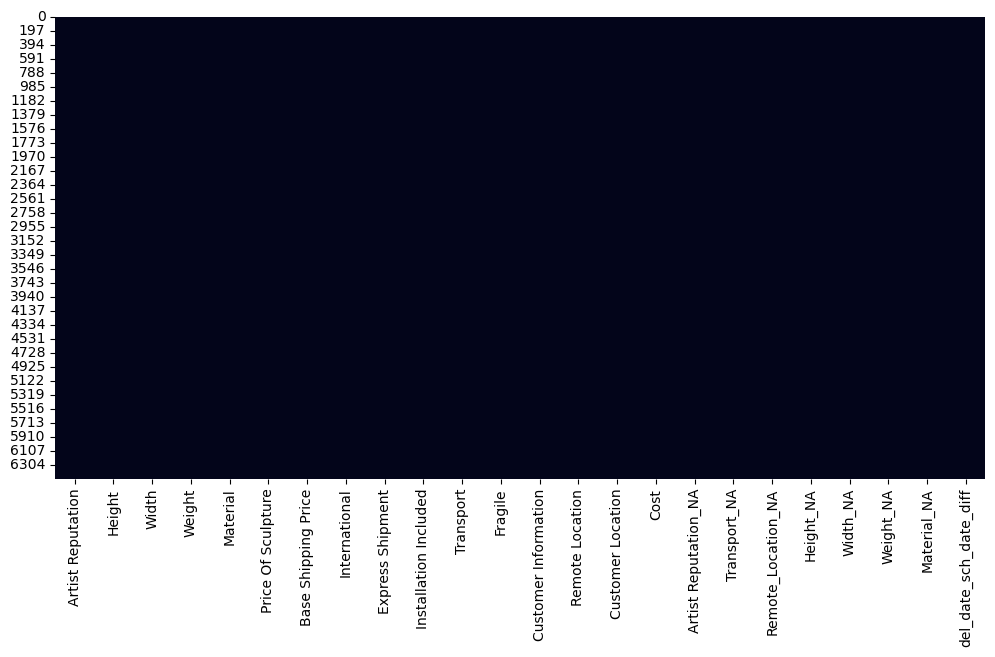

In [92]:
# Visualize missings pattern of the dataframe

plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)

# ENCODING

In [93]:
# Install feature_engine library
#!pip install feature_engine

In [94]:
# One-Hot Encoding
 
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(top_categories=None)

ohe_enc.fit(data)

data = ohe_enc.transform(data)


In [95]:
data.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost,Artist Reputation_NA,Transport_NA,Remote_Location_NA,Height_NA,Width_NA,Weight_NA,Material_NA,del_date_sch_date_diff,Material_Brass,Material_Clay,Material_Aluminium,Material_Wood,Material_Marble,Material_Bronze,Material_Stone,International_Yes,International_No,Express Shipment_Yes,Express Shipment_No,Installation Included_No,Installation Included_Yes,Transport_Airways,Transport_Roadways,Transport_Waterways,Fragile_No,Fragile_Yes,Customer Information_Working Class,Customer Information_Wealthy,Remote Location_No,Remote Location_Yes,Customer Location_OH,Customer Location_WY,Customer Location_WA,Customer Location_KY,Customer Location_PA,Customer Location_AL,Customer Location_WV,Customer Location_CA,Customer Location_ND,Customer Location_GA,Customer Location_DC,Customer Location_TX,Customer Location_CO,Customer Location_AE,Customer Location_OR,Customer Location_MI,Customer Location_NM,Customer Location_AR,Customer Location_AP,Customer Location_VT,Customer Location_IA,Customer Location_MN,Customer Location_NH,Customer Location_SC,Customer Location_AA,Customer Location_OK,Customer Location_HI,Customer Location_RI,Customer Location_LA,Customer Location_DE,Customer Location_ID,Customer Location_CT,Customer Location_MS,Customer Location_FL,Customer Location_VA,Customer Location_MA,Customer Location_KS,Customer Location_ME,Customer Location_NC,Customer Location_NV,Customer Location_MD,Customer Location_SD,Customer Location_WI,Customer Location_MT,Customer Location_IL,Customer Location_AZ,Customer Location_AK,Customer Location_NY,Customer Location_NJ,Customer Location_TN,Customer Location_NE,Customer Location_MO,Customer Location_IN,Customer Location_UT
0,0.26,17.0,6.000000,4128.0,13.91,16.27,-283.29,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.28,3.0,3.000000,61.0,6.83,15.00,-159.96,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.07,8.0,5.000000,237.0,4.96,21.18,-154.29,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.12,9.0,9.617647,3102.0,5.81,16.31,-161.16,0,1,0,0,1,1,0,4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.15,17.0,6.000000,324.0,3.18,11.94,-159.23,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# Spliting the labels and the target
train_X = data.drop(['Cost'],axis=1)

train_y = np.log(np.abs(data['Cost']))

In [97]:

from sklearn.model_selection import train_test_split


# train test split with 80% train data and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_y,test_size=0.2)

In [98]:
X_train.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Artist Reputation_NA,Transport_NA,Remote_Location_NA,Height_NA,Width_NA,Weight_NA,Material_NA,del_date_sch_date_diff,Material_Brass,Material_Clay,Material_Aluminium,Material_Wood,Material_Marble,Material_Bronze,Material_Stone,International_Yes,International_No,Express Shipment_Yes,Express Shipment_No,Installation Included_No,Installation Included_Yes,Transport_Airways,Transport_Roadways,Transport_Waterways,Fragile_No,Fragile_Yes,Customer Information_Working Class,Customer Information_Wealthy,Remote Location_No,Remote Location_Yes,Customer Location_OH,Customer Location_WY,Customer Location_WA,Customer Location_KY,Customer Location_PA,Customer Location_AL,Customer Location_WV,Customer Location_CA,Customer Location_ND,Customer Location_GA,Customer Location_DC,Customer Location_TX,Customer Location_CO,Customer Location_AE,Customer Location_OR,Customer Location_MI,Customer Location_NM,Customer Location_AR,Customer Location_AP,Customer Location_VT,Customer Location_IA,Customer Location_MN,Customer Location_NH,Customer Location_SC,Customer Location_AA,Customer Location_OK,Customer Location_HI,Customer Location_RI,Customer Location_LA,Customer Location_DE,Customer Location_ID,Customer Location_CT,Customer Location_MS,Customer Location_FL,Customer Location_VA,Customer Location_MA,Customer Location_KS,Customer Location_ME,Customer Location_NC,Customer Location_NV,Customer Location_MD,Customer Location_SD,Customer Location_WI,Customer Location_MT,Customer Location_IL,Customer Location_AZ,Customer Location_AK,Customer Location_NY,Customer Location_NJ,Customer Location_TN,Customer Location_NE,Customer Location_MO,Customer Location_IN,Customer Location_UT
1908,0.91,34.000000,11.0,2261.0,8.31,20.13,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4796,0.97,20.000000,9.0,5691.0,41.13,28.23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4645,0.93,6.000000,4.0,32.0,5.06,18.09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3928,0.52,21.766204,8.0,3102.0,168.22,50.17,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4893,0.57,15.000000,6.0,43379.0,239.09,37.78,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [100]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [101]:
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [102]:
X_train.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Artist Reputation_NA,Transport_NA,Remote_Location_NA,Height_NA,Width_NA,Weight_NA,Material_NA,del_date_sch_date_diff,Material_Brass,Material_Clay,Material_Aluminium,Material_Wood,Material_Marble,Material_Bronze,Material_Stone,International_Yes,International_No,Express Shipment_Yes,Express Shipment_No,Installation Included_No,Installation Included_Yes,Transport_Airways,Transport_Roadways,Transport_Waterways,Fragile_No,Fragile_Yes,Customer Information_Working Class,Customer Information_Wealthy,Remote Location_No,Remote Location_Yes,Customer Location_OH,Customer Location_WY,Customer Location_WA,Customer Location_KY,Customer Location_PA,Customer Location_AL,Customer Location_WV,Customer Location_CA,Customer Location_ND,Customer Location_GA,Customer Location_DC,Customer Location_TX,Customer Location_CO,Customer Location_AE,Customer Location_OR,Customer Location_MI,Customer Location_NM,Customer Location_AR,Customer Location_AP,Customer Location_VT,Customer Location_IA,Customer Location_MN,Customer Location_NH,Customer Location_SC,Customer Location_AA,Customer Location_OK,Customer Location_HI,Customer Location_RI,Customer Location_LA,Customer Location_DE,Customer Location_ID,Customer Location_CT,Customer Location_MS,Customer Location_FL,Customer Location_VA,Customer Location_MA,Customer Location_KS,Customer Location_ME,Customer Location_NC,Customer Location_NV,Customer Location_MD,Customer Location_SD,Customer Location_WI,Customer Location_MT,Customer Location_IL,Customer Location_AZ,Customer Location_AK,Customer Location_NY,Customer Location_NJ,Customer Location_TN,Customer Location_NE,Customer Location_MO,Customer Location_IN,Customer Location_UT
0,1.808082,1.057920,0.265369,-0.137756,-0.130150,-0.637889,-0.367591,-0.520358,-0.370618,-0.247873,-0.311151,-0.314116,-0.366242,0.030911,-0.383592,2.604694,-0.387213,-0.380287,-0.376301,-0.380949,-0.36489,-0.719587,0.719587,-0.710679,0.710679,-1.220828,1.220828,-0.628668,0.949358,-0.485532,-2.255880,2.255880,0.602232,-0.602232,-2.169796,2.169796,-0.120972,-0.127359,-0.142857,-0.121787,-0.125,-0.132712,7.535103,-0.136416,-0.127359,-0.142155,-0.125791,-0.137871,-0.125,-0.187168,-0.134205,-0.144946,-0.142857,-0.141449,-0.202586,-0.128137,-0.132712,-0.135682,-0.137871,-0.140028,-0.202071,-0.124204,-0.120151,-0.134205,-0.130443,-0.14074,-0.144253,-0.135682,-0.129679,-0.130443,-0.135682,-0.138593,-0.13196,-0.120972,-0.139312,-0.119325,-0.134205,-0.132712,-0.142857,-0.13196,-0.148366,-0.144946,-0.13196,-0.125791,-0.124204,-0.13346,-0.122598,-0.139312,-0.129679,-0.123404
1,2.049265,-0.152188,-0.122004,-0.136469,-0.126680,-0.336039,-0.367591,-0.520358,-0.370618,-0.247873,-0.311151,-0.314116,-0.366242,-1.372886,2.606933,-0.383922,-0.387213,-0.380287,-0.376301,-0.380949,-0.36489,-0.719587,0.719587,1.407104,-1.407104,-1.220828,1.220828,1.590664,-1.053344,-0.485532,0.443286,-0.443286,-1.660490,1.660490,0.460873,-0.460873,8.266398,-0.127359,-0.142857,-0.121787,-0.125,-0.132712,-0.132712,-0.136416,-0.127359,-0.142155,-0.125791,-0.137871,-0.125,-0.187168,-0.134205,-0.144946,-0.142857,-0.141449,-0.202586,-0.128137,-0.132712,-0.135682,-0.137871,-0.140028,-0.202071,-0.124204,-0.120151,-0.134205,-0.130443,-0.14074,-0.144253,-0.135682,-0.129679,-0.130443,-0.135682,-0.138593,-0.13196,-0.120972,-0.139312,-0.119325,-0.134205,-0.132712,-0.142857,-0.13196,-0.148366,-0.144946,-0.13196,-0.125791,-0.124204,-0.13346,-0.122598,-0.139312,-0.129679,-0.123404
2,1.888476,-1.362297,-1.090434,-0.138593,-0.130494,-0.713910,-0.367591,-0.520358,-0.370618,-0.247873,-0.311151,-0.314116,-0.366242,-1.372886,-0.383592,-0.383922,-0.387213,2.629594,-0.376301,-0.380949,-0.36489,-0.719587,0.719587,-0.710679,0.710679,-1.220828,1.220828,-0.628668,-1.053344,2.059596,0.443286,-0.443286,0.602232,-0.602232,0.460873,-0.460873,-0.120972,-0.127359,-0.142857,-0.121787,8.000,-0.132712,-0.132712,-0.136416,-0.127359,-0.142155,-0.125791,-0.137871,-0.125,-0.187168,-0.134205,

# Building the machine learning model on the processed dataset

In [103]:
# importing necessary libraries for getting metric of model
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

   

In [104]:
# Function for calculating all the relevant metrics 

def print_score(m):
    
    res = [math.sqrt(((m.predict(X_train)- Y_train)**2).mean()),math.sqrt(((m.predict(X_test)- Y_test)**2).mean()),
           m.score(X_train, Y_train),m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train),metrics.mean_absolute_error(m.predict(X_test), Y_test)]
    
    print("RMSE-Train: "+ str(res[0]) + "\nRMSE-Test: "+ str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: "+ str(res[3]) + "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: "+ str(res[5]) + "\nMeanAE-Train: "+ str(res[6]) + "\nMeanAE-Test: " + str(res[7]))
    

# Linear Regression

In [106]:
%%time

from sklearn.linear_model import LinearRegression

lModel = LinearRegression()

lModel.fit(X_train,Y_train)

print_score(lModel)



RMSE-Train: 0.7647115017297267
RMSE-Test: 0.7949913642571431
Score-Train: 0.7872352905701557
Score-Test: 0.7624619925633982
MedAE-Train: 0.3442556859700736
MedAE-Test: 0.3603447840710796
MeanAE-Train: 0.510265306582808
MeanAE-Test: 0.5366498726330194
CPU times: total: 203 ms
Wall time: 143 ms


# Random Forest Regressor

In [107]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

rf.fit(X_train,Y_train)

print_score(rf)


RMSE-Train: 0.1292565846280575
RMSE-Test: 0.3351004216238089
Score-Train: 0.9939213141045884
Score-Test: 0.9577955509241485
MedAE-Train: 0.05051219617854663
MedAE-Test: 0.13122259574171702
MeanAE-Train: 0.08029756816438985
MeanAE-Test: 0.20957395427907247
CPU times: total: 29.9 s
Wall time: 33.3 s


# KNeighbors Regressor

In [108]:
%%time

from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()

knnr.fit(X_train,Y_train)

print_score(knnr)

RMSE-Train: 0.9841278008760704
RMSE-Test: 1.2891108178085462
Score-Train: 0.6476231645802546
Score-Test: 0.37541896543123254
MedAE-Train: 0.46932392615519714
MedAE-Test: 0.6084049347592639
MeanAE-Train: 0.6814957435762174
MeanAE-Test: 0.8746695137256995
CPU times: total: 6.36 s
Wall time: 2.68 s


# Gradient Boosting Regressor

In [109]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,Y_train)

print_score(GBR)

RMSE-Train: 0.3057589118639271
RMSE-Test: 0.34971658278335355
Score-Train: 0.9659856169377934
Score-Test: 0.9540335738420681
MedAE-Train: 0.13112909911679527
MedAE-Test: 0.1388767097948227
MeanAE-Train: 0.20214910668281405
MeanAE-Test: 0.21832227374990298
CPU times: total: 6.12 s
Wall time: 6.34 s


# DecisionTree Regressor

In [110]:
%%time

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train,Y_train)

print_score(DTR)

RMSE-Train: 0.0
RMSE-Test: 0.47657526921911914
Score-Train: 1.0
Score-Test: 0.914636681348172
MedAE-Train: 0.0
MedAE-Test: 0.1953568367764058
MeanAE-Train: 0.0
MeanAE-Test: 0.3054364242430439
CPU times: total: 672 ms
Wall time: 715 ms


# AdaBoost Regressor

In [111]:
%%time

from sklearn.ensemble import AdaBoostRegressor

AdaBoost = AdaBoostRegressor()

AdaBoost.fit(X_train,Y_train)

print_score(AdaBoost)

RMSE-Train: 0.6269524160737469
RMSE-Test: 0.6370337880658455
Score-Train: 0.8569876606548905
Score-Test: 0.847477743258901
MedAE-Train: 0.5096279397314145
MedAE-Test: 0.4908093813552914
MeanAE-Train: 0.5317711255075194
MeanAE-Test: 0.5257593033462822
CPU times: total: 7.16 s
Wall time: 7.66 s


# XGBoost

In [112]:
%%time

from xgboost import XGBRegressor

xgbr = XGBRegressor()

xgbr.fit(X_train,Y_train)

print_score(xgbr)

RMSE-Train: 0.10121840480951526
RMSE-Test: 0.30354864302486695
Score-Train: 0.9962724512909151
Score-Test: 0.9653690122708669
MedAE-Train: 0.05169789531805158
MedAE-Test: 0.10899038520602433
MeanAE-Train: 0.07075710780115188
MeanAE-Test: 0.18616875840805133
CPU times: total: 7.97 s
Wall time: 2.82 s


# Comparing all models

In [113]:

models= [lModel,DTR, rf, knnr, GBR, xgbr, AdaBoost]

names = ['LinearReg','Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']

In [114]:
train_scores = []
test_scores = []

for m in models:
    train_scores.append(m.score(X_train, Y_train))
    test_scores.append(m.score(X_test,Y_test))
  

<AxesSubplot:>

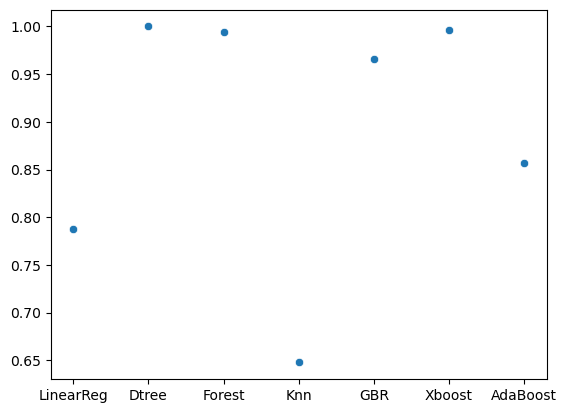

In [115]:
sns.scatterplot(names,train_scores)
sns.scatterplot()

<AxesSubplot:>

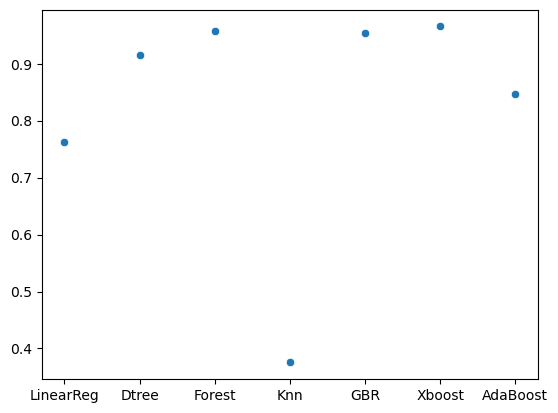

In [116]:
sns.scatterplot(names,test_scores)

In [117]:

# comparison based on meterics for each model.
# Helper function for comparing model , parameters are model instance list, model name list,train test splitted data
def compare_models(models,names,X_train,Y_train,X_test,Y_test):
    
    import sklearn.metrics as metrics


     
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
     
    result_train = pd.DataFrame(data)
    
    result_test = pd.DataFrame(data)
    
    # looping through models instance list and names list simultaneously using zip method
    for (model,name) in zip(models,names):
        
        y_pred= model.predict(X_test)
        
        res = [math.sqrt(((model.predict(X_train)- Y_train)**2).mean()),math.sqrt(((model.predict(X_test)- Y_test)**2).mean()),
                metrics.median_absolute_error(model.predict(X_train), Y_train),metrics.median_absolute_error(model.predict(X_test), Y_test),
                metrics.mean_absolute_error(model.predict(X_train), Y_train),metrics.mean_absolute_error(model.predict(X_test), Y_test),
                metrics.r2_score(model.predict(X_train), Y_train),metrics.r2_score(model.predict(X_test), Y_test)]
        
        result_train[name] = [res[0],res[2],res[4],res[6]]
        result_test[name] = [res[1],res[3],res[5],res[7]]
    
    
    return result_train,result_test

In [118]:
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [119]:
print("Results on Train data")
comp_model_train

Results on Train data


,Metric,LinearReg,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,0.764712,0.0,0.129257,0.984128,0.305759,0.101218,0.626952
1,MedAE,0.344256,0.0,0.050512,0.469324,0.131129,0.051698,0.509628
2,MAE,0.510265,0.0,0.080298,0.681496,0.202149,0.070757,0.531771
3,R-squared,0.729921,1.0,0.993726,0.146362,0.963585,0.996237,0.821636


In [120]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,LinearReg,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,0.794991,0.476575,0.335100,1.289111,0.349717,0.303549,0.637034
1,MedAE,0.360345,0.195357,0.131223,0.608405,0.138877,0.108990,0.490809
2,MAE,0.536650,0.305436,0.209574,0.874670,0.218322,0.186169,0.525759
3,R-squared,0.690424,0.913736,0.954809,-1.081992,0.949943,0.964264,0.806073


# Hyperparameter Tunning

RamdomizedSearchCV

In [121]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross validation, 
    
    
    random = RandomizedSearchCV(model,param_grid,n_iter=10,cv=3,verbose=2,n_jobs=-1)
    
    random.fit(X_train,Y_train)
    print("\n Best parameters: ",random.best_params_)

In [122]:
%%time

rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 400, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 9, num = 3)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}


random_Search(RandomForestRegressor(),X_train, Y_train,rf_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 351, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 9, 'bootstrap': True}
CPU times: total: 50 s
Wall time: 1min 53s


In [123]:
%%time

GBR_para_grid = {
'n_estimators':  [x for x in range(200,500, 50)], 
 'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [x for x in range(5,17, 3)], 
 'min_samples_split': [x for x in range(2,10)]
}


random_Search(GradientBoostingRegressor(),X_train, Y_train,GBR_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 8, 'learning_rate': 0.2}
CPU times: total: 34.7 s
Wall time: 3min 2s


In [124]:
%%time

knn_para_grid = {
                  'leaf_size' :list(range(1,10)),
                  'n_neighbors' : list(range(1,20)),
                  'p' :[1,2]
              }


random_Search( KNeighborsRegressor(),X_train, Y_train,knn_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'p': 1, 'n_neighbors': 14, 'leaf_size': 3}
CPU times: total: 250 ms
Wall time: 8.39 s


In [125]:
%%time

DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
              }


random_Search(DecisionTreeRegressor(),X_train, Y_train,DTR_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 9, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 3}
CPU times: total: 375 ms
Wall time: 1.44 s


In [126]:
%%time

Ada_para_grid = {
                  'n_estimators' :[10, 50, 100, 500],
                  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
              }


random_Search(AdaBoostRegressor(),X_train, Y_train,Ada_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 500, 'learning_rate': 0.01}
CPU times: total: 54.1 s
Wall time: 1min 43s


In [127]:
%%time

XGB_para_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


random_Search(XGBRegressor(),X_train, Y_train,XGB_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5}
CPU times: total: 8.84 s
Wall time: 23.7 s


# Re training the models with the best parameters

Random Forest Regressor

In [128]:
%%time
rf= RandomForestRegressor(**{'n_estimators': 265, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 9, 'bootstrap': True})
rf.fit(X_train,Y_train)
print_score(rf)

RMSE-Train: 0.23506002770464143
RMSE-Test: 0.34077543730086873
Score-Train: 0.9798969517026668
Score-Test: 0.9563539591780982
MedAE-Train: 0.11329771606513894
MedAE-Test: 0.14843221179134503
MeanAE-Train: 0.1600932703167747
MeanAE-Test: 0.21929863745741798
CPU times: total: 41.4 s
Wall time: 44.1 s


Gradient Boosting Regressor

In [129]:
%%time
GBR = GradientBoostingRegressor(**{'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 5, 'learning_rate': 0.3})
GBR.fit(X_train,Y_train)
print_score(GBR)

RMSE-Train: 0.07336699189984872
RMSE-Test: 0.3039533236774048
Score-Train: 0.9980415802683241
Score-Test: 0.9652766130270951
MedAE-Train: 0.04389657892010712
MedAE-Test: 0.10520797344790234
MeanAE-Train: 0.055334934820593956
MeanAE-Test: 0.1796750641121177
CPU times: total: 19 s
Wall time: 20.3 s


KNeighbors Regressor

In [130]:
%%time
knnr = KNeighborsRegressor(**{'p': 1, 'n_neighbors': 19, 'leaf_size': 2})
knnr.fit(X_train,Y_train)
print_score(knnr)

RMSE-Train: 1.1526708546134594
RMSE-Test: 1.2393285104066405
Score-Train: 0.5165907300296244
Score-Test: 0.42272710245706624
MedAE-Train: 0.5520000222654065
MedAE-Test: 0.5954879968965234
MeanAE-Train: 0.7833535860741995
MeanAE-Test: 0.8375349368372242
CPU times: total: 28.7 s
Wall time: 11 s


Decision Tree Regressor

In [131]:
%%time
DTR = DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 1, 'max_leaf_nodes': 70, 'max_features': None, 'max_depth': 11})
DTR.fit(X_train,Y_train)
print_score(DTR)

RMSE-Train: 1.083050866390427
RMSE-Test: 1.0484687073471741
Score-Train: 0.573221966202944
Score-Test: 0.5868390826757302
MedAE-Train: 0.5001007628465075
MedAE-Test: 0.5042729691132926
MeanAE-Train: 0.7363750272798623
MeanAE-Test: 0.7253056386536807
CPU times: total: 219 ms
Wall time: 76.8 ms


AdaBoost Regressor

In [132]:
%%time
AdaBoost = AdaBoostRegressor(**{'n_estimators': 100, 'learning_rate': 0.1})
AdaBoost.fit(X_train,Y_train)
print_score(AdaBoost)


RMSE-Train: 0.5538468942497222
RMSE-Test: 0.57587642962495
Score-Train: 0.8883949620577887
Score-Test: 0.8753572868856965
MedAE-Train: 0.35961328222755995
MedAE-Test: 0.36481506558478705
MeanAE-Train: 0.42986443536830504
MeanAE-Test: 0.44068657993732147
CPU times: total: 14 s
Wall time: 15.4 s


XG Boost

In [133]:
%%time
xgbr = XGBRegressor(**{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7})
xgbr.fit(X_train,Y_train)
print_score(xgbr)


RMSE-Train: 0.2254562800244931
RMSE-Test: 0.30590611484172586
Score-Train: 0.9815060778995709
Score-Test: 0.9648290091518026
MedAE-Train: 0.10052832213142615
MedAE-Test: 0.12251412834775621
MeanAE-Train: 0.14973450330481414
MeanAE-Test: 0.1885145917289081
CPU times: total: 6.05 s
Wall time: 2.88 s


# Comparing all models

In [134]:
%%time

# create a list of objects of models
models= [DTR, rf, knnr, GBR, xgbr, AdaBoost]
# create a list of names of each model
names = ['Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
# passing data for comparison
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

CPU times: total: 41.6 s
Wall time: 19.6 s


In [135]:
print("Results on Train data")
comp_model_train

Results on Train data


,Metric,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,1.083051,0.235060,1.152671,0.073367,0.225456,0.553847
1,MedAE,0.500101,0.113298,0.552000,0.043897,0.100528,0.359613
2,MAE,0.736375,0.160093,0.783354,0.055335,0.149735,0.429864
3,R-squared,0.255475,0.978819,-1.661931,0.998029,0.980120,0.871208


In [136]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,1.048469,0.340775,1.239329,0.303953,0.305906,0.575876
1,MedAE,0.504273,0.148432,0.595488,0.105208,0.122514,0.364815
2,MAE,0.725306,0.219299,0.837535,0.179675,0.188515,0.440687
3,R-squared,0.312224,0.952677,-2.811186,0.964069,0.961017,0.852125


# Conclusion

We did training and prediction using all the above models and selected Gradient Boosting Model as final model as it performed well compard to other models with least rmse and acurracy of 99% on train data and around 96% on test data.